In [1]:
import tutorenvs
from tutorenvs.utils import DataShopLogger
from tutorenvs.multicolumn_std import MultiColumnAddition
from tutorenvs.fractions_std import FractionArithmetic
from tutorenvs.trainer import AuthorTrainer

In [2]:


env = FractionArithmetic(check_how=False, check_args=True,
            demo_args=True, demo_how=False)

#for i in range(100):
#    print(env.problem_config[0])
#    env.set_random_problem()
    
    
test_set = [
    ('+', [('1', '8'), ('13', '8')]),
    ('+', [('15', '13'), ('5', '13')]),
    ('*', [('3', '2'), ('12', '4')]),
    ('*', [('12', '8'), ('6', '5')]),
    ('*', [('7', '11'), ('14', '3')]),
    ('+', [('9', '9'), ('15', '9')]),
    ('+', [('1', '14'), ('13', '15')]),
    ('*', [('13', '4'), ('4', '8')]),
    ('+', [('3', '9'), ('11', '3')]),
    ('+', [('7', '7'), ('9', '7')]),
    ('+', [('3', '5'), ('11', '5')]),
    ('*', [('13', '4'), ('6', '14')]),
    ('+', [('13', '2'), ('8', '5')]),
    ('*', [('4', '5'), ('5', '7')]),
    ('*', [('7', '2'), ('13', '6')]),
    ('+', [('4', '13'), ('11', '6')]),
    ('*', [('7', '6'), ('1', '7')]),
    ('+', [('8', '13'), ('1', '13')]),
    ('+', [('6', '11'), ('6', '11')]),
    ('+', [('2', '14'), ('8', '14')]),
    ('+', [('5', '7'), ('13', '3')]),
    ('+', [('4', '10'), ('3', '10')]),
    ('+', [('12', '13'), ('5', '10')]),
    ('*', [('3', '13'), ('11', '9')]),
    ('+', [('7', '3'), ('2', '13')]),
    ('+', [('5', '14'), ('1', '14')]),
    ('*', [('3', '8'), ('8', '13')]),
]

env.make_completeness_profile(test_set, "ground_truth.txt")

print(len(test_set))

27


In [3]:
def log_completeness(agent, profile='ground_truth.txt', log=[]):
    log.append(agent.eval_completeness(profile))


def run_training(agent, logger_name='FractionArithmetic', n=10,
                 author_train=True):
    logger = DataShopLogger(logger_name, extra_kcs=['field'])

    env = FractionArithmetic(check_how=False, check_args=True,
            demo_args=True, demo_how=False, )

    # make_completeness_profile(env, training_set+edge_case_set, 'exp_z_ground_truth.txt')
    trainer = AuthorTrainer(agent, env, logger=logger, n_problems=100)
    c_log = []
    profile = "ground_truth.txt"
    trainer.on_problem_end = lambda : log_completeness(agent, profile, log=c_log)

    # else:
    #     env = MultiColumnAddition(check_how=False, check_args=False, demo_args=True, demo_how=True, n_digits=n_columns)
    #     trainer = Trainer(agent, env, logger=logger, problem_set=problem_set, n_problems=n)
    trainer.start()
    for i, obj in enumerate(c_log):
        print(f"corr={obj['correctness']*100:2.2f}%, compl={obj['completeness']*100:.2f}%")
    return c_log
    

In [4]:
from apprentice.agents.cre_agents.cre_agent import CREAgent
agent_args = {
    "search_depth" : 2,
    #"where_learner": "antiunify",
    "where_learner": "mostspecific",
    # "when_learner": "sklearndecisiontree",    
    "explanation_choice" : "least_operations",
    
    "planner" : "setchaining",
    "function_set" : ["Add","Multiply"],
    
    "feature_set" : ['Equals'],
    
    "extra_features" : ["Match"],
    "find_neighbors" : True,
    "when_args": {"encode_relative" : True, "one_hot" : True, "check_sanity" : False},
}

dt_args = {
    "when_learner": "decisiontree",
    #"when_learner": "sklearndecisiontree",    
}
stand_args = {
    "when_learner": "stand",
    "which_learner": "when_prediction",
    "action_chooser" : "max_which_utility",
    "suggest_uncert_neg" : True,
}

stand_relaxed_args = {**stand_args,
    "when_args" : {
        **agent_args['when_args'],
        "split_choice" : "all_near_max"
    }
}

import numpy as np
import matplotlib.pyplot as plt

markers = ['+', '.', 'o']
colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']#['#DD5337', 'dodgerblue', 'dimgrey'] #'#FF8C44', 
def plot_cmp(d, title, ylim=(-0.05, 1.05)):
    for i, (label, prof) in enumerate(d.items()):
        if(prof is None):
            continue
        
        cmp = [d['completeness'] for d in prof]
        plt.plot(np.arange(1,len(cmp)+1), cmp, label=label, color=colors[i])#, marker=markers[i])
    plt.title(title)
    plt.xlabel('Problem #')
    plt.ylabel('Post-Problem Completeness')
    plt.legend(loc="lower right")
    plt.ylim(*ylim)
    plt.axhline(1.0, linestyle='--', color="#dddddd99")
    plt.show()


CRE Cache Lives Here:  /home/danny/.cache/cre/cre_cache


/home/danny/.local/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/danny/.local/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


	uint_to_inheritance_bytes: 136.279053 ms
unicode_type


## Fractions

In [5]:
dt_agent = CREAgent(**agent_args, **dt_args)
log_dt = run_training(dt_agent)

STARTING PROBLEM M_2/13*2/15
EXPLAIN DEMO!
foci_match True ['init_num1', 'init_num2'] ['init_num1', 'init_num2'] s(f8(a.value) * f8(b.value))
foci_match True ['init_num1', 'init_num2'] ['init_num1', 'init_num2'] s(f8(a.value) + f8(b.value))
foci_match True ['init_num1', 'init_num2'] ['init_num1', 'init_num2'] s(f8(a.value) * f8(b.value))
foci_match True ['init_num1', 'init_num2'] ['init_num1', 'init_num2'] s(f8(a.value) + f8(b.value))
Any FOCI MATCH True
$$$$ {'encode_relative': True, 'one_hot': True, 'check_sanity': False, 'extra_features': [<function Match at 0x7fa24ac2cf70>]} False
ENCODE MISSING True ONE HOT True
$$$$ {'encode_relative': True, 'one_hot': True, 'check_sanity': False, 'extra_features': [<function Match at 0x7fa24ac2cf70>]} False
ENCODE MISSING True ONE HOT True
ENCODE MISSING True ONE HOT True
INDUCE SKILL Skill_PBAXD(a * b) s(f8(a.value) * f8(b.value))
>> Skill_PBAXD(a * b) ('ans_num', 'init_num1', 'init_num2')


/home/danny/.local/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


EXPLAIN DEMO!
foci_match False ['init_den2', 'init_den1'] ['init_den1', 'init_den2'] s(f8(a.value) * f8(b.value))
foci_match True ['init_den1', 'init_den2'] ['init_den1', 'init_den2'] s(f8(a.value) * f8(b.value))
Any FOCI MATCH True
>> Skill_PBAXD(a * b) ('ans_den', 'init_den2', 'init_den1')
HINT: ans_num -> {'value': '4'}
HINT: ans_den -> {'value': '195'}
APPLY: ans_num -> {'value': '4'}
CORRECT: ans_den -> {'value': '195'}
APPLY: ans_den -> {'value': '195'}
EXPLAIN DEMO!
$$$$ {'encode_relative': True, 'one_hot': True, 'check_sanity': False, 'extra_features': [<function Match at 0x7fa24ac2cf70>]} False
ENCODE MISSING True ONE HOT True
$$$$ {'encode_relative': True, 'one_hot': True, 'check_sanity': False, 'extra_features': [<function Match at 0x7fa24ac2cf70>]} False
ENCODE MISSING True ONE HOT True
ENCODE MISSING True ONE HOT True
INDUCE SKILL Skill_K5TgC(-1) -1
>> Skill_K5TgC(-1) ('done',)
HINT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: ans_num -> {'value': '4'}
INCO

Correctness : 63.64%
Completeness : 47.73%
return_diffs False
STARTING PROBLEM AS_15/8+7/8
EXPLAIN DEMO!
foci_match False ['init_num2', 'init_num1'] ['init_num1', 'init_num2'] s(f8(a.value) + f8(b.value))
foci_match True ['init_num1', 'init_num2'] ['init_num1', 'init_num2'] s(f8(a.value) + f8(b.value))
Any FOCI MATCH True
INCORRECT: check_convert -> {'value': 'x'}
INCORRECT: conv_num2 -> {'value': '56'}
INCORRECT: conv_num1 -> {'value': '120'}
INCORRECT: conv_den2 -> {'value': '64'}
INCORRECT: conv_den1 -> {'value': '64'}
CORRECT: ans_den -> {'value': '8'}
HINT: ans_num -> {'value': '22'}
APPLY: ans_num -> {'value': '22'}
CORRECT: ans_den -> {'value': '8'}
APPLY: ans_den -> {'value': '8'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: ans_num -> {'value': '22'}
APPLY: ans_num -> {'value': '22'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 5 of 100
Correctness : 60.91%
Completeness : 52.73%
re

Correctness : 90.91%
Completeness : 57.27%
return_diffs False
STARTING PROBLEM M_9/4*9/13
CORRECT: ans_num -> {'value': '81'}
CORRECT: ans_den -> {'value': '52'}
INCORRECT: ans_num -> {'value': '18'}
INCORRECT: check_convert -> {'value': 'x'}
APPLY: ans_num -> {'value': '81'}
CORRECT: ans_den -> {'value': '52'}
APPLY: ans_den -> {'value': '52'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: ans_num -> {'value': '81'}
APPLY: ans_num -> {'value': '81'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 13 of 100
Correctness : 100.00%
Completeness : 93.64%
return_diffs False
STARTING PROBLEM M_15/10*5/2
CORRECT: ans_num -> {'value': '75'}
CORRECT: ans_den -> {'value': '20'}
APPLY: ans_num -> {'value': '75'}
CORRECT: ans_den -> {'value': '20'}
APPLY: ans_den -> {'value': '20'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: ans_num -> {'value': '75'}
APPLY: ans_num -> {'value': '75

CORRECT: ans_num -> {'value': '30'}
APPLY: ans_num -> {'value': '30'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 19 of 100
Correctness : 87.73%
Completeness : 80.45%
return_diffs False
STARTING PROBLEM AS_9/12+9/12
INCORRECT: check_convert -> {'value': 'x'}
CORRECT: ans_num -> {'value': '18'}
CORRECT: ans_den -> {'value': '12'}
APPLY: ans_num -> {'value': '18'}
CORRECT: ans_den -> {'value': '12'}
APPLY: ans_den -> {'value': '12'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: ans_num -> {'value': '18'}
APPLY: ans_num -> {'value': '18'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 20 of 100
Correctness : 100.00%
Completeness : 65.91%
return_diffs False
STARTING PROBLEM M_1/12*5/11
CORRECT: ans_num -> {'value': '5'}
CORRECT: ans_den -> {'value': '132'}
INCORRECT: check_convert -> {'value': 'x'}
APPLY: ans_num -> {'value'

Correctness : 100.00%
Completeness : 96.82%
return_diffs False
STARTING PROBLEM AD_11/8+8/15
CORRECT: check_convert -> {'value': 'x'}
APPLY: check_convert -> {'value': 'x'}
CORRECT: conv_num2 -> {'value': '64'}
CORRECT: conv_num1 -> {'value': '165'}
CORRECT: conv_den2 -> {'value': '120'}
CORRECT: conv_den1 -> {'value': '120'}
APPLY: conv_den1 -> {'value': '120'}
CORRECT: conv_num2 -> {'value': '64'}
CORRECT: conv_num1 -> {'value': '165'}
CORRECT: conv_den2 -> {'value': '120'}
APPLY: conv_den2 -> {'value': '120'}
CORRECT: conv_num2 -> {'value': '64'}
CORRECT: conv_num1 -> {'value': '165'}
APPLY: conv_num1 -> {'value': '165'}
CORRECT: conv_num2 -> {'value': '64'}
APPLY: conv_num2 -> {'value': '64'}
CORRECT: ans_num -> {'value': '229'}
CORRECT: ans_den -> {'value': '120'}
APPLY: ans_num -> {'value': '229'}
CORRECT: ans_den -> {'value': '120'}
INCORRECT: ans_den -> {'value': '8'}
APPLY: ans_den -> {'value': '120'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: conv_nu

CORRECT: conv_num2 -> {'value': '10'}
CORRECT: conv_num1 -> {'value': '154'}
CORRECT: conv_den2 -> {'value': '140'}
CORRECT: conv_den1 -> {'value': '140'}
APPLY: conv_den1 -> {'value': '140'}
CORRECT: conv_num2 -> {'value': '10'}
CORRECT: conv_num1 -> {'value': '154'}
CORRECT: conv_den2 -> {'value': '140'}
APPLY: conv_den2 -> {'value': '140'}
CORRECT: conv_num2 -> {'value': '10'}
CORRECT: conv_num1 -> {'value': '154'}
APPLY: conv_num1 -> {'value': '154'}
CORRECT: conv_num2 -> {'value': '10'}
APPLY: conv_num2 -> {'value': '10'}
CORRECT: ans_num -> {'value': '164'}
CORRECT: ans_den -> {'value': '140'}
APPLY: ans_num -> {'value': '164'}
CORRECT: ans_den -> {'value': '140'}
APPLY: ans_den -> {'value': '140'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: conv_num2 -> {'value': '10'}
CORRECT: conv_num1 -> {'value': '154'}
CORRECT: conv_den1 -> {'value': '140'}
APPLY: conv_den1 -> {'value': '140'}
CORRECT: conv_num2 -> {'value': '10'}
CORRECT: conv_den1 -> {'value': '14

Correctness : 90.00%
Completeness : 67.27%
return_diffs False
STARTING PROBLEM AD_12/3+10/6
INCORRECT: ans_num -> {'value': '22'}
CORRECT: check_convert -> {'value': 'x'}
APPLY: check_convert -> {'value': 'x'}
CORRECT: conv_num2 -> {'value': '30'}
CORRECT: conv_num1 -> {'value': '72'}
CORRECT: conv_den2 -> {'value': '18'}
CORRECT: conv_den1 -> {'value': '18'}
APPLY: conv_den1 -> {'value': '18'}
CORRECT: conv_num2 -> {'value': '30'}
CORRECT: conv_num1 -> {'value': '72'}
CORRECT: conv_den2 -> {'value': '18'}
APPLY: conv_den2 -> {'value': '18'}
CORRECT: conv_num2 -> {'value': '30'}
CORRECT: conv_num1 -> {'value': '72'}
APPLY: conv_num1 -> {'value': '72'}
CORRECT: conv_num2 -> {'value': '30'}
APPLY: conv_num2 -> {'value': '30'}
CORRECT: ans_num -> {'value': '102'}
CORRECT: ans_den -> {'value': '18'}
APPLY: ans_num -> {'value': '102'}
CORRECT: ans_den -> {'value': '18'}
APPLY: ans_den -> {'value': '18'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: conv_num2 -> {'valu

CORRECT: ans_num -> {'value': '48'}
APPLY: ans_num -> {'value': '48'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 46 of 100
Correctness : 100.00%
Completeness : 96.82%
return_diffs False
STARTING PROBLEM AD_2/13+9/11
CORRECT: check_convert -> {'value': 'x'}
APPLY: check_convert -> {'value': 'x'}
CORRECT: conv_num2 -> {'value': '117'}
CORRECT: conv_num1 -> {'value': '22'}
CORRECT: conv_den2 -> {'value': '143'}
CORRECT: conv_den1 -> {'value': '143'}
APPLY: conv_den1 -> {'value': '143'}
CORRECT: conv_num2 -> {'value': '117'}
CORRECT: conv_num1 -> {'value': '22'}
CORRECT: conv_den2 -> {'value': '143'}
APPLY: conv_den2 -> {'value': '143'}
CORRECT: conv_num2 -> {'value': '117'}
CORRECT: conv_num1 -> {'value': '22'}
APPLY: conv_num1 -> {'value': '22'}
CORRECT: conv_num2 -> {'value': '117'}
APPLY: conv_num2 -> {'value': '117'}
CORRECT: ans_num -> {'value': '139'}
CORRECT: ans_den -> {'value': '143'}
APPLY: ans_num -> {'v

Correctness : 100.00%
Completeness : 96.82%
return_diffs False
STARTING PROBLEM M_2/11*7/8
CORRECT: ans_num -> {'value': '14'}
CORRECT: ans_den -> {'value': '88'}
APPLY: ans_num -> {'value': '14'}
CORRECT: ans_den -> {'value': '88'}
APPLY: ans_den -> {'value': '88'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: ans_num -> {'value': '14'}
APPLY: ans_num -> {'value': '14'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 52 of 100
Correctness : 100.00%
Completeness : 96.82%
return_diffs False
STARTING PROBLEM AS_9/15+11/15
CORRECT: ans_num -> {'value': '20'}
CORRECT: ans_den -> {'value': '15'}
APPLY: ans_num -> {'value': '20'}
CORRECT: ans_den -> {'value': '15'}
APPLY: ans_den -> {'value': '15'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: ans_num -> {'value': '20'}
APPLY: ans_num -> {'value': '20'}
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

CORRECT: conv_num2 -> {'value': '36'}
CORRECT: conv_den2 -> {'value': '90'}
APPLY: conv_den2 -> {'value': '90'}
CORRECT: conv_den2 -> {'value': '90'}
APPLY: conv_den2 -> {'value': '90'}
CORRECT: conv_num1 -> {'value': '195'}
APPLY: conv_num1 -> {'value': '195'}
CORRECT: ans_num -> {'value': '231'}
APPLY: ans_num -> {'value': '231'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 56 of 100
Correctness : 100.00%
Completeness : 96.82%
return_diffs False
STARTING PROBLEM AD_7/6+1/9
CORRECT: check_convert -> {'value': 'x'}
APPLY: check_convert -> {'value': 'x'}
CORRECT: conv_num2 -> {'value': '6'}
CORRECT: conv_num1 -> {'value': '63'}
CORRECT: conv_den2 -> {'value': '54'}
CORRECT: conv_den1 -> {'value': '54'}
APPLY: conv_den1 -> {'value': '54'}
CORRECT: conv_num2 -> {'value': '6'}
CORRECT: conv_num1 -> {'value': '63'}
CORRECT: conv_den2 -> {'value': '54'}
APPLY: conv_den2 -> {'value': '54'}
CORRECT: conv_num2 -> {'value':

CORRECT: conv_num1 -> {'value': '88'}
APPLY: conv_num1 -> {'value': '88'}
CORRECT: ans_num -> {'value': '116'}
APPLY: ans_num -> {'value': '116'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 63 of 100
Correctness : 100.00%
Completeness : 96.82%
return_diffs False
STARTING PROBLEM AD_1/5+4/8
CORRECT: check_convert -> {'value': 'x'}
APPLY: check_convert -> {'value': 'x'}
CORRECT: conv_num2 -> {'value': '20'}
CORRECT: conv_num1 -> {'value': '8'}
CORRECT: conv_den2 -> {'value': '40'}
CORRECT: conv_den1 -> {'value': '40'}
APPLY: conv_den1 -> {'value': '40'}
CORRECT: conv_num2 -> {'value': '20'}
CORRECT: conv_num1 -> {'value': '8'}
CORRECT: conv_den2 -> {'value': '40'}
APPLY: conv_den2 -> {'value': '40'}
CORRECT: conv_num2 -> {'value': '20'}
CORRECT: conv_num1 -> {'value': '8'}
APPLY: conv_num1 -> {'value': '8'}
CORRECT: conv_num2 -> {'value': '20'}
APPLY: conv_num2 -> {'value': '20'}
CORRECT: ans_num -> {'value': '28'}

CORRECT: ans_num -> {'value': '72'}
APPLY: ans_num -> {'value': '72'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 73 of 100
Correctness : 92.27%
Completeness : 72.73%
return_diffs False
STARTING PROBLEM AS_15/5+7/5
CORRECT: ans_num -> {'value': '22'}
CORRECT: ans_den -> {'value': '5'}
APPLY: ans_num -> {'value': '22'}
CORRECT: ans_den -> {'value': '5'}
APPLY: ans_den -> {'value': '5'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: ans_num -> {'value': '22'}
APPLY: ans_num -> {'value': '22'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 74 of 100
Correctness : 92.27%
Completeness : 74.55%
return_diffs False
STARTING PROBLEM M_3/9*9/15
CORRECT: ans_num -> {'value': '27'}
CORRECT: ans_den -> {'value': '135'}
APPLY: ans_num -> {'value': '27'}
CORRECT: ans_den -> {'value': '135'}
APPLY: ans_den -> {'value': '135'}
CORRECT: do

CORRECT: conv_num2 -> {'value': '30'}
CORRECT: conv_num1 -> {'value': '18'}
CORRECT: conv_den2 -> {'value': '135'}
APPLY: conv_den2 -> {'value': '135'}
CORRECT: conv_num2 -> {'value': '30'}
CORRECT: conv_num1 -> {'value': '18'}
APPLY: conv_num1 -> {'value': '18'}
CORRECT: conv_num2 -> {'value': '30'}
APPLY: conv_num2 -> {'value': '30'}
CORRECT: ans_num -> {'value': '48'}
CORRECT: ans_den -> {'value': '135'}
APPLY: ans_num -> {'value': '48'}
CORRECT: ans_den -> {'value': '135'}
APPLY: ans_den -> {'value': '135'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: conv_num2 -> {'value': '30'}
CORRECT: conv_num1 -> {'value': '18'}
CORRECT: conv_den1 -> {'value': '135'}
APPLY: conv_den1 -> {'value': '135'}
CORRECT: conv_num2 -> {'value': '30'}
CORRECT: conv_den1 -> {'value': '135'}
APPLY: conv_den1 -> {'value': '135'}
CORRECT: conv_den1 -> {'value': '135'}
APPLY: conv_den1 -> {'value': '135'}
CORRECT: conv_num2 -> {'value': '30'}
CORRECT: conv_den2 -> {'value': '135'}
APPL

Correctness : 100.00%
Completeness : 96.82%
return_diffs False
STARTING PROBLEM AD_10/2+13/7
CORRECT: check_convert -> {'value': 'x'}
APPLY: check_convert -> {'value': 'x'}
CORRECT: conv_num2 -> {'value': '26'}
CORRECT: conv_num1 -> {'value': '70'}
CORRECT: conv_den2 -> {'value': '14'}
CORRECT: conv_den1 -> {'value': '14'}
APPLY: conv_den1 -> {'value': '14'}
CORRECT: conv_num2 -> {'value': '26'}
CORRECT: conv_num1 -> {'value': '70'}
CORRECT: conv_den2 -> {'value': '14'}
APPLY: conv_den2 -> {'value': '14'}
CORRECT: conv_num2 -> {'value': '26'}
CORRECT: conv_num1 -> {'value': '70'}
APPLY: conv_num1 -> {'value': '70'}
CORRECT: conv_num2 -> {'value': '26'}
APPLY: conv_num2 -> {'value': '26'}
CORRECT: ans_num -> {'value': '96'}
CORRECT: ans_den -> {'value': '14'}
APPLY: ans_num -> {'value': '96'}
CORRECT: ans_den -> {'value': '14'}
APPLY: ans_den -> {'value': '14'}
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
CORRECT: conv_num2 -> {'value': '26'}
CORRECT: conv_num1 -> {'value

CORRECT: conv_den1 -> {'value': '105'}
APPLY: conv_den1 -> {'value': '105'}
CORRECT: conv_num2 -> {'value': '77'}
CORRECT: conv_den2 -> {'value': '105'}
APPLY: conv_den2 -> {'value': '105'}
CORRECT: conv_den2 -> {'value': '105'}
APPLY: conv_den2 -> {'value': '105'}
CORRECT: conv_num1 -> {'value': '135'}
APPLY: conv_num1 -> {'value': '135'}
CORRECT: ans_num -> {'value': '212'}
APPLY: ans_num -> {'value': '212'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 94 of 100
Correctness : 100.00%
Completeness : 96.82%
return_diffs False
STARTING PROBLEM AD_2/5+3/15
CORRECT: check_convert -> {'value': 'x'}
APPLY: check_convert -> {'value': 'x'}
CORRECT: conv_num2 -> {'value': '15'}
CORRECT: conv_num1 -> {'value': '30'}
CORRECT: conv_den2 -> {'value': '75'}
CORRECT: conv_den1 -> {'value': '75'}
APPLY: conv_den1 -> {'value': '75'}
CORRECT: conv_num2 -> {'value': '15'}
CORRECT: conv_num1 -> {'value': '30'}
CORRECT: conv_den2 -> 

In [6]:
stand_agent = CREAgent(**agent_args, **stand_args)
log_stand = run_training(stand_agent)

STARTING PROBLEM AS_11/6+4/6
EXPLAIN DEMO!
foci_match True ['init_num1', 'init_num2'] ['init_num1', 'init_num2'] s(f8(a.value) + f8(b.value))
foci_match True ['init_num1', 'init_num2'] ['init_num1', 'init_num2'] s(f8(a.value) + f8(b.value))
Any FOCI MATCH True
$$$$ {'encode_relative': True, 'one_hot': True, 'check_sanity': False, 'extra_features': [<function Match at 0x7fa24ac2cf70>, <function Match at 0x7fa24ac2cf70>]} False
ENCODE MISSING True ONE HOT True
ENCODE MISSING True ONE HOT True
SPLIT CHOICE: all_max
INDUCE SKILL Skill_quJN2(a + b) s(f8(a.value) + f8(b.value))
>> Skill_quJN2(a + b) ('ans_num', 'init_num1', 'init_num2')
WILL LEARN False 0.0
fit option_tree: 0.36 ms
fit_spec_ext: 8.09 ms
EXPLAIN DEMO!
foci_match True ['init_den1'] ['init_den1'] s(f8(a.value))
Any FOCI MATCH True
$$$$ {'encode_relative': True, 'one_hot': True, 'check_sanity': False, 'extra_features': [<function Match at 0x7fa24ac2cf70>, <function Match at 0x7fa24ac2cf70>]} False
ENCODE MISSING True ONE HOT Tru

fit option_tree: 5.96 ms
fit_spec_ext: 0.04 ms
WILL LEARN True 3.0
fit option_tree: 5.79 ms
fit_spec_ext: 0.04 ms
WILL LEARN True 82955.83658969804
fit option_tree: 1.62 ms
fit_spec_ext: 0.07 ms
WILL LEARN False 0.0
fit option_tree: 2.36 ms
fit_spec_ext: 0.12 ms
CORRECT: conv_num2 -> {'value': '120'}
CORRECT: conv_den1 -> {'value': '150'}
INCORRECT: ans_den -> {'value': '150'}
INCORRECT: ans_den -> {'value': '10'}
APPLY: conv_den1 -> {'value': '150'}
WILL LEARN False 0.0
fit option_tree: 6.17 ms
fit_spec_ext: 0.04 ms
CORRECT: conv_den1 -> {'value': '150'}
APPLY: conv_den1 -> {'value': '150'}
WILL LEARN False 0.0
fit option_tree: 6.12 ms
fit_spec_ext: 0.03 ms
WILL LEARN True 6.0
fit option_tree: 6.13 ms
fit_spec_ext: 0.04 ms
CORRECT: conv_num2 -> {'value': '120'}
CORRECT: conv_den2 -> {'value': '150'}
APPLY: conv_den2 -> {'value': '150'}
WILL LEARN False 0.0
fit option_tree: 6.75 ms
fit_spec_ext: 0.04 ms
WILL LEARN True 74438.2124007139
fit option_tree: 2.28 ms
fit_spec_ext: 0.12 ms
COR

Correctness : 81.82%
Completeness : 47.73%
return_diffs False
STARTING PROBLEM AS_14/5+14/5
WILL LEARN True 10.0
fit option_tree: 0.77 ms
fit_spec_ext: 0.02 ms
EXPLAIN DEMO!
foci_match False ['init_num2', 'init_num1'] ['init_num1', 'init_num2'] s(f8(a.value) + f8(b.value))
foci_match True ['init_num1', 'init_num2'] ['init_num1', 'init_num2'] s(f8(a.value) + f8(b.value))
Any FOCI MATCH True
WILL LEARN False 0.0
fit option_tree: 2.73 ms
fit_spec_ext: 0.12 ms
EXPLAIN DEMO!
foci_match True ['init_den1'] ['init_den1'] s(f8(a.value))
foci_match True ['init_den1'] ['init_den1'] a.value
Any FOCI MATCH True
WILL LEARN True 6636.0
fit option_tree: 2.27 ms
fit_spec_ext: 0.05 ms
INCORRECT: check_convert -> {'value': 'x'}
HINT: ans_num -> {'value': '28'}
HINT: ans_den -> {'value': '5'}
APPLY: ans_num -> {'value': '28'}
WILL LEARN True 96.0
fit option_tree: 2.21 ms
fit_spec_ext: 0.05 ms
CORRECT: ans_den -> {'value': '5'}
APPLY: ans_den -> {'value': '5'}
WILL LEARN True 210.0
fit option_tree: 1.62 ms

Correctness : 100.00%
Completeness : 96.82%
return_diffs False
STARTING PROBLEM AD_2/10+3/4
WILL LEARN True 380.0
fit option_tree: 1.28 ms
fit_spec_ext: 0.06 ms
CORRECT: check_convert -> {'value': 'x'}
APPLY: check_convert -> {'value': 'x'}
WILL LEARN True 896.0
fit option_tree: 24.11 ms
fit_spec_ext: 0.18 ms
WILL LEARN True 896.0
fit option_tree: 23.20 ms
fit_spec_ext: 0.18 ms
WILL LEARN True 448.0
fit option_tree: 23.68 ms
fit_spec_ext: 0.18 ms
WILL LEARN True 448.0
fit option_tree: 24.27 ms
fit_spec_ext: 0.18 ms
CORRECT: conv_num2 -> {'value': '30'}
CORRECT: conv_num1 -> {'value': '8'}
CORRECT: conv_den2 -> {'value': '40'}
CORRECT: conv_den1 -> {'value': '40'}
APPLY: conv_den1 -> {'value': '40'}
WILL LEARN False 0.0
fit option_tree: 24.54 ms
fit_spec_ext: 0.20 ms
WILL LEARN False 0.0
fit option_tree: 25.05 ms
fit_spec_ext: 0.20 ms
WILL LEARN True 448.0
fit option_tree: 27.50 ms
fit_spec_ext: 0.22 ms
CORRECT: conv_num2 -> {'value': '30'}
CORRECT: conv_den2 -> {'value': '40'}
CORRECT:

fit option_tree: 35.61 ms
fit_spec_ext: 0.24 ms
CORRECT: conv_num2 -> {'value': '180'}
CORRECT: conv_den1 -> {'value': '24'}
APPLY: conv_den1 -> {'value': '24'}
WILL LEARN False 0.0
fit option_tree: 36.06 ms
fit_spec_ext: 0.25 ms
CORRECT: conv_den1 -> {'value': '24'}
APPLY: conv_den1 -> {'value': '24'}
WILL LEARN False 0.0
fit option_tree: 34.15 ms
fit_spec_ext: 0.25 ms
WILL LEARN False 0.0
fit option_tree: 34.87 ms
fit_spec_ext: 0.27 ms
CORRECT: conv_num2 -> {'value': '180'}
CORRECT: conv_den2 -> {'value': '24'}
APPLY: conv_den2 -> {'value': '24'}
WILL LEARN False 0.0
fit option_tree: 35.00 ms
fit_spec_ext: 0.25 ms
CORRECT: conv_den2 -> {'value': '24'}
APPLY: conv_den2 -> {'value': '24'}
WILL LEARN False 0.0
fit option_tree: 35.56 ms
fit_spec_ext: 0.26 ms
CORRECT: conv_num1 -> {'value': '4'}
APPLY: conv_num1 -> {'value': '4'}
WILL LEARN False 0.0
fit option_tree: 3.13 ms
fit_spec_ext: 0.08 ms
CORRECT: ans_num -> {'value': '184'}
APPLY: ans_num -> {'value': '184'}
+++++++++++++++++++++

fit option_tree: 42.17 ms
fit_spec_ext: 0.41 ms
CORRECT: conv_num2 -> {'value': '130'}
CORRECT: conv_num1 -> {'value': '42'}
APPLY: conv_num1 -> {'value': '42'}
WILL LEARN False 0.0
fit option_tree: 42.09 ms
fit_spec_ext: 0.31 ms
CORRECT: conv_num2 -> {'value': '130'}
APPLY: conv_num2 -> {'value': '130'}
WILL LEARN True 29040.0
fit option_tree: 3.93 ms
fit_spec_ext: 0.09 ms
WILL LEARN True 120.0
fit option_tree: 3.12 ms
fit_spec_ext: 0.05 ms
CORRECT: ans_den -> {'value': '39'}
CORRECT: ans_num -> {'value': '172'}
APPLY: ans_num -> {'value': '172'}
WILL LEARN False 0.0
fit option_tree: 3.90 ms
fit_spec_ext: 0.09 ms
WILL LEARN False 0.0
fit option_tree: 4.21 ms
fit_spec_ext: 0.09 ms
CORRECT: ans_den -> {'value': '39'}
INCORRECT: ans_den -> {'value': '13'}
APPLY: ans_den -> {'value': '39'}
WILL LEARN True 150.0
fit option_tree: 3.16 ms
fit_spec_ext: 0.05 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
WILL LEARN False 0.0
fit option_tree: 41.79 ms
fit_spec_ext: 0.30 ms
WILL

fit option_tree: 49.46 ms
fit_spec_ext: 0.35 ms
CORRECT: conv_num2 -> {'value': '140'}
CORRECT: conv_num1 -> {'value': '28'}
CORRECT: conv_den2 -> {'value': '20'}
CORRECT: conv_den1 -> {'value': '20'}
APPLY: conv_den1 -> {'value': '20'}
WILL LEARN False 0.0
fit option_tree: 50.51 ms
fit_spec_ext: 0.40 ms
WILL LEARN False 0.0
fit option_tree: 48.58 ms
fit_spec_ext: 0.34 ms
WILL LEARN False 0.0
fit option_tree: 50.43 ms
fit_spec_ext: 0.31 ms
CORRECT: conv_num2 -> {'value': '140'}
CORRECT: conv_num1 -> {'value': '28'}
CORRECT: conv_den2 -> {'value': '20'}
APPLY: conv_den2 -> {'value': '20'}
WILL LEARN False 0.0
fit option_tree: 51.77 ms
fit_spec_ext: 0.32 ms
WILL LEARN True 448.0
fit option_tree: 54.86 ms
fit_spec_ext: 0.33 ms
CORRECT: conv_num2 -> {'value': '140'}
CORRECT: conv_num1 -> {'value': '28'}
APPLY: conv_num1 -> {'value': '28'}
WILL LEARN False 0.0
fit option_tree: 50.86 ms
fit_spec_ext: 0.35 ms
CORRECT: conv_num2 -> {'value': '140'}
APPLY: conv_num2 -> {'value': '140'}
WILL LEA

Correctness : 100.00%
Completeness : 96.82%
return_diffs False
STARTING PROBLEM AD_7/3+11/4
WILL LEARN True 190.0
fit option_tree: 1.57 ms
fit_spec_ext: 0.06 ms
CORRECT: check_convert -> {'value': 'x'}
APPLY: check_convert -> {'value': 'x'}
WILL LEARN True 448.0
fit option_tree: 55.62 ms
fit_spec_ext: 0.41 ms
WILL LEARN False 0.0
fit option_tree: 56.11 ms
fit_spec_ext: 0.36 ms
WILL LEARN True 896.0
fit option_tree: 58.20 ms
fit_spec_ext: 0.48 ms
WILL LEARN True 448.0
fit option_tree: 56.75 ms
fit_spec_ext: 0.37 ms
CORRECT: conv_num1 -> {'value': '28'}
CORRECT: conv_den1 -> {'value': '12'}
CORRECT: conv_num2 -> {'value': '33'}
CORRECT: conv_den2 -> {'value': '12'}
APPLY: conv_den1 -> {'value': '12'}
WILL LEARN False 0.0
fit option_tree: 55.87 ms
fit_spec_ext: 0.40 ms
WILL LEARN False 0.0
fit option_tree: 55.51 ms
fit_spec_ext: 0.39 ms
WILL LEARN False 0.0
fit option_tree: 56.72 ms
fit_spec_ext: 0.43 ms
CORRECT: conv_num2 -> {'value': '33'}
CORRECT: conv_num1 -> {'value': '28'}
CORRECT: 

Correctness : 99.55%
Completeness : 93.64%
return_diffs False
STARTING PROBLEM M_10/12*1/7
WILL LEARN True 896.0
fit option_tree: 69.42 ms
fit_spec_ext: 0.67 ms
WILL LEARN True 448.0
fit option_tree: 72.18 ms
fit_spec_ext: 0.71 ms
CORRECT: ans_num -> {'value': '10'}
CORRECT: ans_den -> {'value': '84'}
APPLY: ans_num -> {'value': '10'}
WILL LEARN True 1344.0
fit option_tree: 74.73 ms
fit_spec_ext: 0.42 ms
CORRECT: ans_den -> {'value': '84'}
APPLY: ans_den -> {'value': '84'}
WILL LEARN True 150.0
fit option_tree: 4.35 ms
fit_spec_ext: 0.05 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
WILL LEARN False 0.0
fit option_tree: 74.84 ms
fit_spec_ext: 0.47 ms
CORRECT: ans_num -> {'value': '10'}
APPLY: ans_num -> {'value': '10'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 33 of 100
Correctness : 99.55%
Completeness : 93.64%
return_diffs False
STARTING PROBLEM AD_3/12+10/15
WILL LEARN False 0.0
fit option_t

fit option_tree: 90.24 ms
fit_spec_ext: 0.62 ms
WILL LEARN True 448.0
fit option_tree: 86.90 ms
fit_spec_ext: 0.62 ms
CORRECT: conv_num2 -> {'value': '117'}
CORRECT: conv_num1 -> {'value': '112'}
APPLY: conv_num1 -> {'value': '112'}
WILL LEARN False 0.0
fit option_tree: 85.33 ms
fit_spec_ext: 0.59 ms
CORRECT: conv_num2 -> {'value': '117'}
APPLY: conv_num2 -> {'value': '117'}
WILL LEARN True 4356.0
fit option_tree: 6.72 ms
fit_spec_ext: 0.10 ms
WILL LEARN True 504.0
fit option_tree: 5.59 ms
fit_spec_ext: 0.08 ms
CORRECT: ans_den -> {'value': '72'}
CORRECT: ans_num -> {'value': '229'}
APPLY: ans_num -> {'value': '229'}
WILL LEARN False 0.0
fit option_tree: 6.55 ms
fit_spec_ext: 0.10 ms
CORRECT: ans_den -> {'value': '72'}
APPLY: ans_den -> {'value': '72'}
WILL LEARN False 0.0
fit option_tree: 5.05 ms
fit_spec_ext: 0.05 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
WILL LEARN False 0.0
fit option_tree: 85.49 ms
fit_spec_ext: 0.57 ms
WILL LEARN False 0.0
fit option_tree: 84

Correctness : 88.64%
Completeness : 63.18%
return_diffs False
STARTING PROBLEM AS_14/13+13/13
WILL LEARN True 36.0
fit option_tree: 6.72 ms
fit_spec_ext: 0.10 ms
WILL LEARN True 51379.14432989691
fit option_tree: 10.98 ms
fit_spec_ext: 0.32 ms
CORRECT: ans_den -> {'value': '13'}
CORRECT: ans_num -> {'value': '27'}
APPLY: ans_num -> {'value': '27'}
WILL LEARN False 0.0
fit option_tree: 6.52 ms
fit_spec_ext: 0.09 ms
CORRECT: ans_den -> {'value': '13'}
APPLY: ans_den -> {'value': '13'}
WILL LEARN True 30.0
fit option_tree: 4.17 ms
fit_spec_ext: 0.04 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
WILL LEARN True 4536.0
fit option_tree: 10.87 ms
fit_spec_ext: 0.30 ms
CORRECT: ans_num -> {'value': '27'}
APPLY: ans_num -> {'value': '27'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 40 of 100
Correctness : 88.18%
Completeness : 63.18%
return_diffs False
STARTING PROBLEM AS_2/3+13/3
WILL LEARN False 0.0
fit

Correctness : 100.00%
Completeness : 95.00%
return_diffs False
STARTING PROBLEM M_11/15*2/12
WILL LEARN False 0.0
fit option_tree: 91.95 ms
fit_spec_ext: 0.60 ms
WILL LEARN False 0.0
fit option_tree: 92.11 ms
fit_spec_ext: 0.59 ms
CORRECT: ans_num -> {'value': '22'}
CORRECT: ans_den -> {'value': '180'}
APPLY: ans_num -> {'value': '22'}
WILL LEARN False 0.0
fit option_tree: 91.55 ms
fit_spec_ext: 0.68 ms
CORRECT: ans_den -> {'value': '180'}
APPLY: ans_den -> {'value': '180'}
WILL LEARN False 0.0
fit option_tree: 4.79 ms
fit_spec_ext: 0.05 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
WILL LEARN False 0.0
fit option_tree: 92.52 ms
fit_spec_ext: 0.57 ms
CORRECT: ans_num -> {'value': '22'}
APPLY: ans_num -> {'value': '22'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 45 of 100
Correctness : 100.00%
Completeness : 95.00%
return_diffs False
STARTING PROBLEM AD_12/3+7/8
WILL LEARN True 95.0
fit option_tr

fit option_tree: 99.82 ms
fit_spec_ext: 0.67 ms
WILL LEARN False 0.0
fit option_tree: 102.07 ms
fit_spec_ext: 0.67 ms
CORRECT: conv_num2 -> {'value': '180'}
CORRECT: conv_num1 -> {'value': '77'}
CORRECT: conv_den1 -> {'value': '84'}
APPLY: conv_den1 -> {'value': '84'}
WILL LEARN False 0.0
fit option_tree: 101.14 ms
fit_spec_ext: 0.70 ms
WILL LEARN True 448.0
fit option_tree: 102.72 ms
fit_spec_ext: 0.65 ms
CORRECT: conv_num2 -> {'value': '180'}
CORRECT: conv_den1 -> {'value': '84'}
APPLY: conv_den1 -> {'value': '84'}
WILL LEARN False 0.0
fit option_tree: 102.40 ms
fit_spec_ext: 0.64 ms
CORRECT: conv_den1 -> {'value': '84'}
APPLY: conv_den1 -> {'value': '84'}
WILL LEARN False 0.0
fit option_tree: 102.33 ms
fit_spec_ext: 0.66 ms
WILL LEARN False 0.0
fit option_tree: 103.07 ms
fit_spec_ext: 0.70 ms
CORRECT: conv_num2 -> {'value': '180'}
CORRECT: conv_den2 -> {'value': '84'}
APPLY: conv_den2 -> {'value': '84'}
WILL LEARN False 0.0
fit option_tree: 103.33 ms
fit_spec_ext: 0.66 ms
CORRECT: c

fit option_tree: 110.56 ms
fit_spec_ext: 0.71 ms
WILL LEARN False 0.0
fit option_tree: 111.27 ms
fit_spec_ext: 0.67 ms
WILL LEARN False 0.0
fit option_tree: 110.92 ms
fit_spec_ext: 0.89 ms
CORRECT: conv_num2 -> {'value': '8'}
CORRECT: conv_num1 -> {'value': '6'}
CORRECT: conv_den2 -> {'value': '12'}
CORRECT: conv_den1 -> {'value': '12'}
APPLY: conv_den1 -> {'value': '12'}
WILL LEARN False 0.0
fit option_tree: 109.30 ms
fit_spec_ext: 0.70 ms
WILL LEARN False 0.0
fit option_tree: 111.97 ms
fit_spec_ext: 0.80 ms
WILL LEARN False 0.0
fit option_tree: 112.27 ms
fit_spec_ext: 0.73 ms
CORRECT: conv_num2 -> {'value': '8'}
CORRECT: conv_num1 -> {'value': '6'}
CORRECT: conv_den2 -> {'value': '12'}
APPLY: conv_den2 -> {'value': '12'}
WILL LEARN False 0.0
fit option_tree: 115.75 ms
fit_spec_ext: 0.65 ms
WILL LEARN False 0.0
fit option_tree: 111.13 ms
fit_spec_ext: 0.72 ms
CORRECT: conv_num2 -> {'value': '8'}
CORRECT: conv_num1 -> {'value': '6'}
APPLY: conv_num1 -> {'value': '6'}
WILL LEARN False 0

Correctness : 100.00%
Completeness : 95.00%
return_diffs False
STARTING PROBLEM M_12/5*2/4
WILL LEARN False 0.0
fit option_tree: 118.55 ms
fit_spec_ext: 0.78 ms
WILL LEARN False 0.0
fit option_tree: 124.27 ms
fit_spec_ext: 0.88 ms
CORRECT: ans_num -> {'value': '24'}
CORRECT: ans_den -> {'value': '20'}
APPLY: ans_num -> {'value': '24'}
WILL LEARN False 0.0
fit option_tree: 124.69 ms
fit_spec_ext: 0.76 ms
CORRECT: ans_den -> {'value': '20'}
APPLY: ans_den -> {'value': '20'}
WILL LEARN False 0.0
fit option_tree: 5.52 ms
fit_spec_ext: 0.05 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
WILL LEARN False 0.0
fit option_tree: 120.55 ms
fit_spec_ext: 0.82 ms
CORRECT: ans_num -> {'value': '24'}
APPLY: ans_num -> {'value': '24'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 54 of 100
Correctness : 100.00%
Completeness : 95.00%
return_diffs False
STARTING PROBLEM AD_10/13+5/12
WILL LEARN True 170.0
fit option_

fit option_tree: 130.35 ms
fit_spec_ext: 0.88 ms
WILL LEARN False 0.0
fit option_tree: 131.59 ms
fit_spec_ext: 0.94 ms
CORRECT: conv_num2 -> {'value': '33'}
CORRECT: conv_num1 -> {'value': '120'}
APPLY: conv_num1 -> {'value': '120'}
WILL LEARN False 0.0
fit option_tree: 133.33 ms
fit_spec_ext: 0.86 ms
CORRECT: conv_num2 -> {'value': '33'}
APPLY: conv_num2 -> {'value': '33'}
WILL LEARN True 4356.0
fit option_tree: 9.81 ms
fit_spec_ext: 0.14 ms
EXPLAIN DEMO!
foci_match False ['conv_num2', 'conv_num1'] ['conv_num1', 'conv_num2'] s(f8(a.value) + f8(b.value))
foci_match True ['conv_num1', 'conv_num2'] ['conv_num1', 'conv_num2'] s(f8(a.value) + f8(b.value))
Any FOCI MATCH True
WILL LEARN True 1772.166666666667
fit option_tree: 7.90 ms
fit_spec_ext: 0.09 ms
CORRECT: ans_den -> {'value': '45'}
HINT: ans_num -> {'value': '153'}
APPLY: ans_num -> {'value': '153'}
WILL LEARN False 0.0
fit option_tree: 9.42 ms
fit_spec_ext: 0.15 ms
CORRECT: ans_den -> {'value': '45'}
APPLY: ans_den -> {'value': '4

fit option_tree: 141.54 ms
fit_spec_ext: 0.98 ms
WILL LEARN False 0.0
fit option_tree: 142.90 ms
fit_spec_ext: 0.89 ms
CORRECT: conv_num2 -> {'value': '112'}
CORRECT: conv_den2 -> {'value': '126'}
APPLY: conv_den2 -> {'value': '126'}
WILL LEARN False 0.0
fit option_tree: 138.81 ms
fit_spec_ext: 0.92 ms
CORRECT: conv_den2 -> {'value': '126'}
APPLY: conv_den2 -> {'value': '126'}
WILL LEARN False 0.0
fit option_tree: 165.07 ms
fit_spec_ext: 1.32 ms
CORRECT: conv_num1 -> {'value': '45'}
APPLY: conv_num1 -> {'value': '45'}
WILL LEARN False 0.0
fit option_tree: 8.33 ms
fit_spec_ext: 0.08 ms
CORRECT: ans_num -> {'value': '157'}
APPLY: ans_num -> {'value': '157'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 61 of 100
Correctness : 100.00%
Completeness : 95.91%
return_diffs False
STARTING PROBLEM M_13/14*5/11
WILL LEARN True 448.0
fit option_tree: 142.45 ms
fit_spec_ext: 1.08 ms
WILL LEARN False 0.0
fit option_tree: 150.86

WILL LEARN True 448.0
fit option_tree: 156.55 ms
fit_spec_ext: 0.96 ms
WILL LEARN False 0.0
fit option_tree: 156.97 ms
fit_spec_ext: 0.85 ms
WILL LEARN True 448.0
fit option_tree: 150.84 ms
fit_spec_ext: 0.92 ms
CORRECT: conv_num1 -> {'value': '24'}
CORRECT: conv_num2 -> {'value': '18'}
CORRECT: conv_den2 -> {'value': '12'}
CORRECT: conv_den1 -> {'value': '12'}
APPLY: conv_den1 -> {'value': '12'}
WILL LEARN False 0.0
fit option_tree: 151.46 ms
fit_spec_ext: 1.00 ms
WILL LEARN False 0.0
fit option_tree: 155.60 ms
fit_spec_ext: 0.94 ms
WILL LEARN False 0.0
fit option_tree: 153.95 ms
fit_spec_ext: 1.15 ms
CORRECT: conv_num2 -> {'value': '18'}
CORRECT: conv_num1 -> {'value': '24'}
CORRECT: conv_den2 -> {'value': '12'}
APPLY: conv_den2 -> {'value': '12'}
WILL LEARN False 0.0
fit option_tree: 168.57 ms
fit_spec_ext: 0.85 ms
WILL LEARN False 0.0
fit option_tree: 149.84 ms
fit_spec_ext: 0.96 ms
CORRECT: conv_num2 -> {'value': '18'}
CORRECT: conv_num1 -> {'value': '24'}
APPLY: conv_num1 -> {'va

fit option_tree: 164.17 ms
fit_spec_ext: 0.93 ms
CORRECT: ans_num -> {'value': '110'}
CORRECT: ans_den -> {'value': '45'}
APPLY: ans_num -> {'value': '110'}
WILL LEARN False 0.0
fit option_tree: 160.23 ms
fit_spec_ext: 0.95 ms
CORRECT: ans_den -> {'value': '45'}
APPLY: ans_den -> {'value': '45'}
WILL LEARN False 0.0
fit option_tree: 7.58 ms
fit_spec_ext: 0.06 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
WILL LEARN False 0.0
fit option_tree: 166.08 ms
fit_spec_ext: 0.98 ms
CORRECT: ans_num -> {'value': '110'}
APPLY: ans_num -> {'value': '110'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 68 of 100
Correctness : 100.00%
Completeness : 95.91%
return_diffs False
STARTING PROBLEM AD_3/12+5/14
WILL LEARN True 85.0
fit option_tree: 2.62 ms
fit_spec_ext: 0.06 ms
CORRECT: check_convert -> {'value': 'x'}
APPLY: check_convert -> {'value': 'x'}
WILL LEARN False 0.0
fit option_tree: 160.53 ms
fit_spec_ext: 1.

fit option_tree: 171.22 ms
fit_spec_ext: 1.26 ms
WILL LEARN True 448.0
fit option_tree: 169.49 ms
fit_spec_ext: 1.03 ms
CORRECT: conv_num2 -> {'value': '91'}
CORRECT: conv_num1 -> {'value': '20'}
APPLY: conv_num1 -> {'value': '20'}
WILL LEARN False 0.0
fit option_tree: 172.34 ms
fit_spec_ext: 0.99 ms
CORRECT: conv_num2 -> {'value': '91'}
APPLY: conv_num2 -> {'value': '91'}
WILL LEARN True 2904.0
fit option_tree: 10.53 ms
fit_spec_ext: 0.11 ms
WILL LEARN True 60.0
fit option_tree: 9.18 ms
fit_spec_ext: 0.08 ms
CORRECT: ans_den -> {'value': '28'}
CORRECT: ans_num -> {'value': '111'}
APPLY: ans_num -> {'value': '111'}
WILL LEARN False 0.0
fit option_tree: 10.50 ms
fit_spec_ext: 0.11 ms
CORRECT: ans_den -> {'value': '28'}
APPLY: ans_den -> {'value': '28'}
WILL LEARN True 30.0
fit option_tree: 7.13 ms
fit_spec_ext: 0.06 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
WILL LEARN False 0.0
fit option_tree: 172.37 ms
fit_spec_ext: 1.17 ms
WILL LEARN False 0.0
fit option_tree: 17

fit option_tree: 179.67 ms
fit_spec_ext: 1.12 ms
WILL LEARN True 448.0
fit option_tree: 181.24 ms
fit_spec_ext: 1.13 ms
WILL LEARN False 0.0
fit option_tree: 179.60 ms
fit_spec_ext: 1.15 ms
WILL LEARN True 448.0
fit option_tree: 180.85 ms
fit_spec_ext: 1.11 ms
CORRECT: conv_num1 -> {'value': '135'}
CORRECT: conv_num2 -> {'value': '60'}
CORRECT: conv_den2 -> {'value': '150'}
CORRECT: conv_den1 -> {'value': '150'}
APPLY: conv_den1 -> {'value': '150'}
WILL LEARN False 0.0
fit option_tree: 181.52 ms
fit_spec_ext: 1.28 ms
WILL LEARN False 0.0
fit option_tree: 180.99 ms
fit_spec_ext: 1.12 ms
WILL LEARN False 0.0
fit option_tree: 180.42 ms
fit_spec_ext: 1.05 ms
CORRECT: conv_num2 -> {'value': '60'}
CORRECT: conv_num1 -> {'value': '135'}
CORRECT: conv_den2 -> {'value': '150'}
APPLY: conv_den2 -> {'value': '150'}
WILL LEARN False 0.0
fit option_tree: 182.30 ms
fit_spec_ext: 1.16 ms
WILL LEARN False 0.0
fit option_tree: 181.20 ms
fit_spec_ext: 1.15 ms
CORRECT: conv_num2 -> {'value': '60'}
CORREC

fit option_tree: 190.77 ms
fit_spec_ext: 1.09 ms
WILL LEARN False 0.0
fit option_tree: 192.73 ms
fit_spec_ext: 1.07 ms
WILL LEARN False 0.0
fit option_tree: 193.18 ms
fit_spec_ext: 1.10 ms
WILL LEARN False 0.0
fit option_tree: 190.68 ms
fit_spec_ext: 1.15 ms
CORRECT: conv_num2 -> {'value': '54'}
CORRECT: conv_num1 -> {'value': '25'}
CORRECT: conv_den2 -> {'value': '45'}
CORRECT: conv_den1 -> {'value': '45'}
APPLY: conv_den1 -> {'value': '45'}
WILL LEARN False 0.0
fit option_tree: 193.61 ms
fit_spec_ext: 1.16 ms
WILL LEARN False 0.0
fit option_tree: 194.46 ms
fit_spec_ext: 1.08 ms
WILL LEARN False 0.0
fit option_tree: 190.94 ms
fit_spec_ext: 1.11 ms
CORRECT: conv_num2 -> {'value': '54'}
CORRECT: conv_num1 -> {'value': '25'}
CORRECT: conv_den2 -> {'value': '45'}
APPLY: conv_den2 -> {'value': '45'}
WILL LEARN False 0.0
fit option_tree: 208.73 ms
fit_spec_ext: 1.42 ms
WILL LEARN False 0.0
fit option_tree: 193.35 ms
fit_spec_ext: 1.24 ms
CORRECT: conv_num2 -> {'value': '54'}
CORRECT: conv_n

fit option_tree: 203.20 ms
fit_spec_ext: 1.15 ms
WILL LEARN False 0.0
fit option_tree: 206.54 ms
fit_spec_ext: 1.16 ms
CORRECT: ans_num -> {'value': '105'}
CORRECT: ans_den -> {'value': '75'}
APPLY: ans_num -> {'value': '105'}
WILL LEARN False 0.0
fit option_tree: 221.17 ms
fit_spec_ext: 1.19 ms
CORRECT: ans_den -> {'value': '75'}
APPLY: ans_den -> {'value': '75'}
WILL LEARN False 0.0
fit option_tree: 8.42 ms
fit_spec_ext: 0.10 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
WILL LEARN False 0.0
fit option_tree: 205.41 ms
fit_spec_ext: 1.27 ms
CORRECT: ans_num -> {'value': '105'}
APPLY: ans_num -> {'value': '105'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 79 of 100
Correctness : 100.00%
Completeness : 95.91%
return_diffs False
STARTING PROBLEM AD_9/4+11/7
WILL LEARN False 0.0
fit option_tree: 3.08 ms
fit_spec_ext: 0.05 ms
CORRECT: check_convert -> {'value': 'x'}
APPLY: check_convert -> {'value': 

fit option_tree: 217.06 ms
fit_spec_ext: 1.86 ms
WILL LEARN False 0.0
fit option_tree: 218.95 ms
fit_spec_ext: 1.20 ms
CORRECT: conv_num2 -> {'value': '63'}
CORRECT: conv_den2 -> {'value': '21'}
APPLY: conv_den2 -> {'value': '21'}
WILL LEARN False 0.0
fit option_tree: 218.37 ms
fit_spec_ext: 1.24 ms
CORRECT: conv_den2 -> {'value': '21'}
APPLY: conv_den2 -> {'value': '21'}
WILL LEARN False 0.0
fit option_tree: 214.60 ms
fit_spec_ext: 1.26 ms
CORRECT: conv_num1 -> {'value': '42'}
APPLY: conv_num1 -> {'value': '42'}
WILL LEARN True 30.0
fit option_tree: 11.53 ms
fit_spec_ext: 0.11 ms
CORRECT: ans_num -> {'value': '105'}
APPLY: ans_num -> {'value': '105'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 81 of 100
Correctness : 100.00%
Completeness : 95.91%
return_diffs False
STARTING PROBLEM AD_6/10+15/2
WILL LEARN False 0.0
fit option_tree: 3.78 ms
fit_spec_ext: 0.05 ms
CORRECT: check_convert -> {'value': 'x'}
APPLY: che

fit option_tree: 222.56 ms
fit_spec_ext: 1.47 ms
WILL LEARN False 0.0
fit option_tree: 227.67 ms
fit_spec_ext: 1.36 ms
WILL LEARN False 0.0
fit option_tree: 222.33 ms
fit_spec_ext: 1.49 ms
WILL LEARN False 0.0
fit option_tree: 225.96 ms
fit_spec_ext: 1.43 ms
CORRECT: conv_num2 -> {'value': '50'}
CORRECT: conv_num1 -> {'value': '98'}
CORRECT: conv_den2 -> {'value': '70'}
CORRECT: conv_den1 -> {'value': '70'}
APPLY: conv_den1 -> {'value': '70'}
WILL LEARN False 0.0
fit option_tree: 225.71 ms
fit_spec_ext: 1.55 ms
WILL LEARN False 0.0
fit option_tree: 224.15 ms
fit_spec_ext: 1.49 ms
WILL LEARN False 0.0
fit option_tree: 228.41 ms
fit_spec_ext: 1.38 ms
CORRECT: conv_num2 -> {'value': '50'}
CORRECT: conv_num1 -> {'value': '98'}
CORRECT: conv_den2 -> {'value': '70'}
APPLY: conv_den2 -> {'value': '70'}
WILL LEARN False 0.0
fit option_tree: 230.66 ms
fit_spec_ext: 1.60 ms
WILL LEARN False 0.0
fit option_tree: 225.33 ms
fit_spec_ext: 1.31 ms
CORRECT: conv_num2 -> {'value': '50'}
CORRECT: conv_n

fit option_tree: 240.63 ms
fit_spec_ext: 1.38 ms
CORRECT: conv_num2 -> {'value': '32'}
CORRECT: conv_num1 -> {'value': '10'}
APPLY: conv_num1 -> {'value': '10'}
WILL LEARN False 0.0
fit option_tree: 238.68 ms
fit_spec_ext: 1.43 ms
CORRECT: conv_num2 -> {'value': '32'}
APPLY: conv_num2 -> {'value': '32'}
WILL LEARN True 2904.0
fit option_tree: 13.45 ms
fit_spec_ext: 0.13 ms
WILL LEARN True 60.0
fit option_tree: 11.76 ms
fit_spec_ext: 0.10 ms
CORRECT: ans_den -> {'value': '16'}
CORRECT: ans_num -> {'value': '42'}
APPLY: ans_num -> {'value': '42'}
WILL LEARN False 0.0
fit option_tree: 14.77 ms
fit_spec_ext: 0.15 ms
CORRECT: ans_den -> {'value': '16'}
APPLY: ans_den -> {'value': '16'}
WILL LEARN False 0.0
fit option_tree: 8.68 ms
fit_spec_ext: 0.07 ms
CORRECT: done -> {'value': -1}
APPLY: done -> {'value': -1}
WILL LEARN False 0.0
fit option_tree: 240.64 ms
fit_spec_ext: 1.32 ms
WILL LEARN False 0.0
fit option_tree: 241.04 ms
fit_spec_ext: 1.48 ms
WILL LEARN False 0.0
fit option_tree: 243.

Correctness : 100.00%
Completeness : 96.82%
return_diffs False
STARTING PROBLEM AD_14/4+5/15
WILL LEARN False 0.0
fit option_tree: 3.79 ms
fit_spec_ext: 0.05 ms
CORRECT: check_convert -> {'value': 'x'}
APPLY: check_convert -> {'value': 'x'}
WILL LEARN False 0.0
fit option_tree: 255.62 ms
fit_spec_ext: 1.41 ms
WILL LEARN False 0.0
fit option_tree: 241.97 ms
fit_spec_ext: 1.41 ms
WILL LEARN False 0.0
fit option_tree: 248.57 ms
fit_spec_ext: 1.73 ms
WILL LEARN False 0.0
fit option_tree: 241.98 ms
fit_spec_ext: 1.43 ms
CORRECT: conv_num2 -> {'value': '20'}
CORRECT: conv_num1 -> {'value': '210'}
CORRECT: conv_den2 -> {'value': '60'}
CORRECT: conv_den1 -> {'value': '60'}
APPLY: conv_den1 -> {'value': '60'}
WILL LEARN False 0.0
fit option_tree: 246.54 ms
fit_spec_ext: 1.51 ms
WILL LEARN False 0.0
fit option_tree: 243.23 ms
fit_spec_ext: 1.57 ms
WILL LEARN False 0.0
fit option_tree: 245.56 ms
fit_spec_ext: 1.42 ms
CORRECT: conv_num2 -> {'value': '20'}
CORRECT: conv_num1 -> {'value': '210'}
COR

fit option_tree: 261.37 ms
fit_spec_ext: 1.41 ms
INCORRECT: ans_den -> {'value': '45'}
INCORRECT: ans_den -> {'value': '15'}
HINT: conv_num1 -> {'value': '3'}
APPLY: conv_num1 -> {'value': '3'}
WILL LEARN False 0.0
fit option_tree: 12.74 ms
fit_spec_ext: 0.10 ms
CORRECT: ans_num -> {'value': '18'}
APPLY: ans_num -> {'value': '18'}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Finished problem 95 of 100
Correctness : 100.00%
Completeness : 85.91%
return_diffs False
STARTING PROBLEM M_15/13*13/4
WILL LEARN True 384.0
fit option_tree: 254.83 ms
fit_spec_ext: 1.60 ms
WILL LEARN False 0.0
fit option_tree: 285.64 ms
fit_spec_ext: 1.89 ms
CORRECT: ans_num -> {'value': '195'}
CORRECT: ans_den -> {'value': '52'}
APPLY: ans_num -> {'value': '195'}
WILL LEARN False 0.0
fit option_tree: 260.55 ms
fit_spec_ext: 1.49 ms
WILL LEARN True 3072.0
fit option_tree: 18.46 ms
fit_spec_ext: 0.29 ms
CORRECT: ans_den -> {'value': '52'}
INCORRECT: ans_den -

Correctness : 100.00%
Completeness : 96.36%
return_diffs False
TOTALS  (correct:1338, incorrect:50, hint:23, assistance:73)
PERCENTS(correct:94.83%, incorrect:3.54%, hint:1.63%, assistance:5.17%)
corr=25.91%, compl=25.91%
corr=25.91%, compl=21.36%
corr=32.27%, compl=29.09%
corr=32.27%, compl=29.09%
corr=57.27%, compl=44.55%
corr=81.82%, compl=47.73%
corr=91.82%, compl=68.64%
corr=95.91%, compl=69.09%
corr=95.91%, compl=80.45%
corr=95.91%, compl=80.45%
corr=100.00%, compl=96.82%
corr=93.64%, compl=70.91%
corr=93.64%, compl=70.91%
corr=93.64%, compl=70.91%
corr=96.36%, compl=76.36%
corr=100.00%, compl=96.82%
corr=100.00%, compl=96.82%
corr=100.00%, compl=96.82%
corr=100.00%, compl=96.82%
corr=100.00%, compl=96.82%
corr=100.00%, compl=96.82%
corr=96.82%, compl=83.18%
corr=96.82%, compl=83.18%
corr=100.00%, compl=96.82%
corr=100.00%, compl=92.27%
corr=100.00%, compl=92.27%
corr=100.00%, compl=96.82%
corr=100.00%, compl=96.82%
corr=100.00%, compl=96.82%
corr=100.00%, compl=96.82%
corr=100.0

In [7]:
#standr_agent = CREAgent(**{**agent_args, **stand_relaxed_args})
#log_standr = run_training(standr_agent)

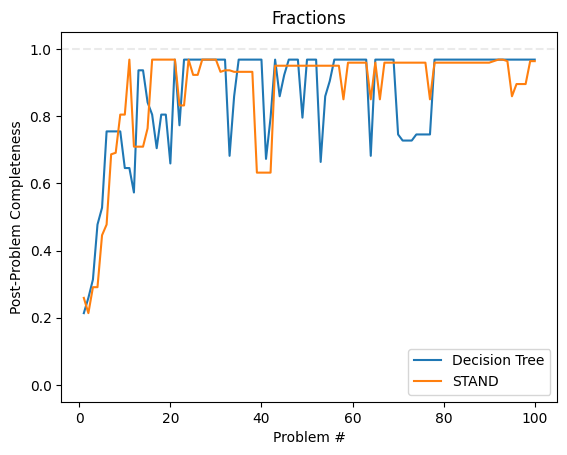

In [8]:
plot_cmp({"Decision Tree":log_dt, "STAND": log_stand}, "Fractions")

In [9]:
for uid, skill in stand_agent.skills.items():
    print(skill)
    print(skill.when_lrn_mech.classifier)
    print()


Skill_quJN2(a + b)
	Tree_get_data_stats: 35.676270 ms
	DataStats_get_u_ys: 36.795410 ms
	DataStats_get_nom_v_inv_maps: 32.327393 ms
	Tree_get_nodes: 32.881104 ms
	TreeNode_get_ttype: 25.130859 ms
	TreeNode_get_index: 24.530518 ms
	TreeNode_get_split_data: 29.721680 ms
	TreeNode_get_counts: 30.700928 ms
	TreeNode_get_op_enum: 22.832031 ms
	SplitData_get_is_continous: 23.562988 ms
	SplitData_get_split_ind: 22.873291 ms
	SplitData_get_val: 26.907959 ms
	SplitData_get_left: 26.886963 ms
	SplitData_get_right: 26.367188 ms
TREE w/ classes: [ 1 -1]
NODE(0) : (TF(a == b, Sel.left.left.left.below.value, Sel.below.left.value),==False)[F:1 T:2] 
	(TF(a == b, Sel.below.left.value, Sel.left.left.left.below.value),==False)[F:1 T:2] 
	(TF(a == b, Sel.left.left.left.below.value, Sel.below.left.value),==True)[F:1 T:2] 
	(TF(a == b, Sel.below.left.value, Sel.left.left.left.below.value),==True)[F:1 T:2] 
LEAF(1) : [0 2]
NODE(2) : (Sel.left.left.above.value,=='+')[F:3 T:4] 
	(Sel.left.left.value,=='+')[F:

/home/danny/.local/lib/python3.9/site-packages/numba/typed/typeddict.py:39: NumbaTypeSafetyWarning: unsafe cast from int64 to int32. Precision may be lost.
  return d[key]


In [10]:
for uid, skill in dt_agent.skills.items():
    print(skill)
    print(skill.when_lrn_mech.classifier)
    print()


Skill_PBAXD(a * b)
TREE w/ classes: [ 1 -1]
NODE(0) : (Sel.left.left.above.locked,==False)[F:1 T:2] 
LEAF(1) : [0 4]
NODE(2) : (TF(a == b, Sel.right.right.below.value, Sel.above.above.value),==False)[F:3 T:4] 
LEAF(3) : [0 4]
NODE(4) : (Sel.left.left.value,=='+')[F:5 T:6] 
LEAF(5) : [0 4]
NODE(6) : (TF(a == b, Sel.below.value, Sel.above.value),==False)[F:7 T:8] 
LEAF(7) : [0 3]
LEAF(8) : [772   0]

Skill_K5TgC(-1)
TREE w/ classes: [ 1 -1]
NODE(0) : (Sel.above.right.right.right.value,=='')[F:1 T:2] 
LEAF(1) : [0 4]
NODE(2) : (Sel.above.right.right.below.right.value,=='')[F:3 T:4] 
LEAF(3) : [0 2]
LEAF(4) : [100   0]

Skill_EgTlz(a + b)
TREE w/ classes: [ 1 -1]
NODE(0) : (TF(a == b, Sel.below.left.value, Sel.left.left.left.below.value),==False)[F:1 T:2] 
LEAF(1) : [0 4]
NODE(2) : (Sel.left.left.above.value,=='*')[F:3 T:4] 
LEAF(3) : [0 2]
NODE(4) : (TF(Arg0:, Sel.left),==None)[F:5 T:6] 
NODE(5) : (TF(a == b, Sel.left.left.left.above.above.value, Sel.left.above.value),==True)[F:7 T:8] 
LE

In [11]:
out = stand_agent.eval_completeness(profile="ground_truth.txt", return_diffs=True)
#print(out)
for diff in out['diffs']:
    print(diff)

Correctness : 100.00%
Completeness : 96.36%
return_diffs True
{'problem': 'AD_1/14+13/15', '-': [], '+': ["{'selection': 'ans_num', 'action_type': 'UpdateTextField', 'inputs': {'value': '197'}}"]}
{'problem': 'AD_3/9+11/3', '-': [], '+': ["{'selection': 'ans_num', 'action_type': 'UpdateTextField', 'inputs': {'value': '108'}}"]}
{'problem': 'AD_13/2+8/5', '-': [], '+': ["{'selection': 'ans_den', 'action_type': 'UpdateTextField', 'inputs': {'value': '2'}}"]}
{'problem': 'AD_13/2+8/5', '-': [], '+': ["{'selection': 'ans_num', 'action_type': 'UpdateTextField', 'inputs': {'value': '81'}}"]}
{'problem': 'AD_4/13+11/6', '-': [], '+': ["{'selection': 'ans_num', 'action_type': 'UpdateTextField', 'inputs': {'value': '167'}}"]}
{'problem': 'AD_5/7+13/3', '-': [], '+': ["{'selection': 'ans_num', 'action_type': 'UpdateTextField', 'inputs': {'value': '106'}}"]}
{'problem': 'AD_12/13+5/10', '-': [], '+': ["{'selection': 'ans_num', 'action_type': 'UpdateTextField', 'inputs': {'value': '185'}}"]}
{'pro